In [2]:
# Load necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
%matplotlib inline

# set default plot size
plt.rcParams["figure.figsize"] = (15,8)

In [21]:
df1 = pd.read_csv('movies.csv',encoding='latin-1')
df1.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [22]:
df2 = pd.read_csv('ratings.csv')
df2.head(10)

,userId,movieId,rating,timestamp
0,1,1,5.0,847117005
1,1,2,3.0,847642142
2,1,10,3.0,847641896
3,1,32,4.0,847642008
4,1,34,4.0,847641956
5,1,47,3.0,847641956
6,1,50,4.0,847642073
7,1,62,4.0,847642105
8,1,150,4.0,847116751
9,1,153,3.0,847116787


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100234 entries, 0 to 100233
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100234 non-null  int64  
 1   movieId    100234 non-null  int64  
 2   rating     100234 non-null  float64
 3   timestamp  100234 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [10]:
df2.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [20]:
# scale the data
min_max_scaler = MinMaxScaler()
data = min_max_scaler.fit_transform(df2)
data
df_scale = pd.DataFrame(data = data,columns=df2.columns[:])

df_scale.head(20)

,userId,movieId,rating,timestamp
0,0.0,0.000000,1.000000,0.031502
1,0.0,0.000007,0.555556,0.032361
2,0.0,0.000066,0.555556,0.032361
3,0.0,0.000228,0.777778,0.032361
4,0.0,0.000243,0.777778,0.032361
5,0.0,0.000339,0.555556,0.032361
6,0.0,0.000361,0.777778,0.032361
7,0.0,0.000449,0.777778,0.032361
8,0.0,0.001097,0.777778,0.031501
9,0.0,0.001119,0.555556,0.031502


<AxesSubplot:>

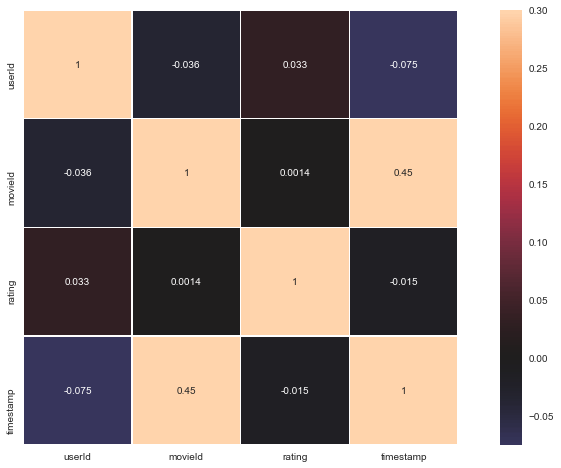

In [23]:
sns.heatmap(df_scale.corr(), vmax=.3, center=0,
            square=True, linewidths=.5, annot = True)

In [24]:
# pass through the scaled data set into our PCA class object
pca = PCA().fit(df_scale)
pca

print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.components_ )
df_scale.columns

[0.09094668 0.07821155 0.05372863 0.01741539]
[0.37846786 0.32547156 0.22358771 0.07247287]
[[-0.74620467  0.19919704 -0.06173423  0.63220884]
 [ 0.66213237  0.23222389  0.03407814  0.71168215]
 [ 0.0688452  -0.01308226 -0.99746915 -0.01202043]
 [-0.00443355  0.95195665 -0.00910298 -0.30606538]]


Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

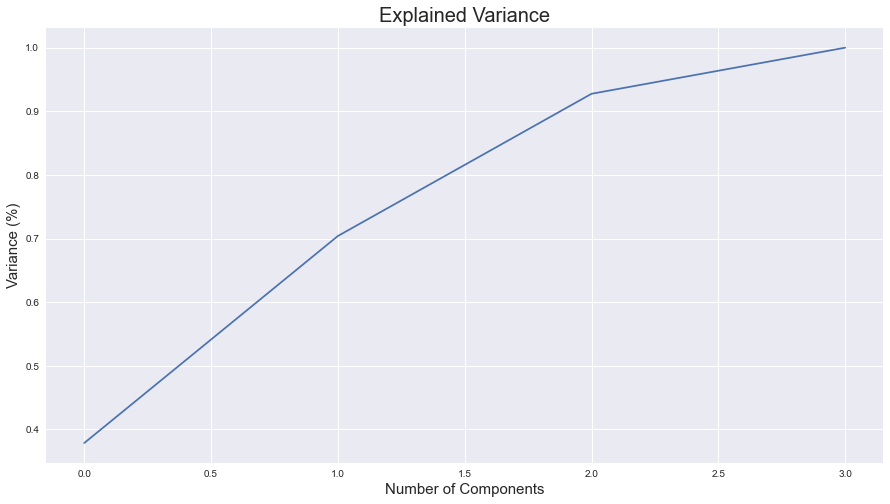

In [25]:
# plot the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# define the labels & title
plt.xlabel('Number of Components', fontsize = 15)
plt.ylabel('Variance (%)', fontsize = 15) 
plt.title('Explained Variance', fontsize = 20)

# show the plot
plt.show()

In [26]:
# we will choose 3 pca components and create a new dataset

pca = PCA(n_components=3).fit(df_scale).transform(df_scale)

# store it in a new data frame
pca= pd.DataFrame(data = pca, columns = ['PC1', 'PC2','PC3'])

pca.head()

,PC1,PC2,PC3
0,0.058615,-0.644060,-0.338974
1,0.086598,-0.658592,0.104336
2,0.086609,-0.658579,0.104335
3,0.072923,-0.650968,-0.117327
4,0.072926,-0.650965,-0.117327


<AxesSubplot:>

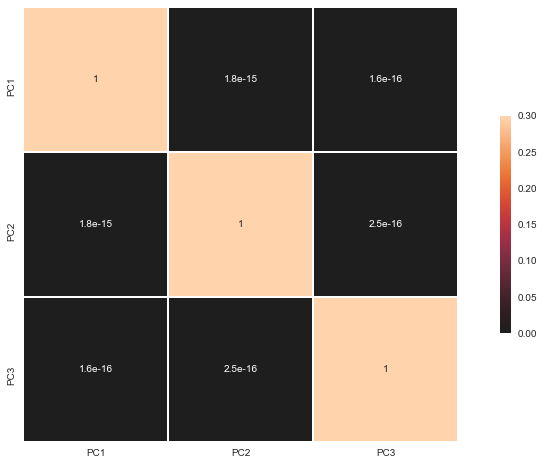

In [27]:
pca_corr = pca.corr()

# Generate a mask for the upper triangle
#mask = np.triu(np.ones_like(country_pca_cor, dtype=np.bool))

# Set up the matplotlib figure
#fig, ax = plt.subplots(figsize=(15, 8))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(pca.corr(), vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = True)